In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-50, 50)
y = X + 10
X, y

(<tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49])>,
 <tf.Tensor: shape=(100,), dtype=int32, numpy=
 array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,

In [3]:
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]
print(f'X_train:{X_train.shape}')
print(f'X_test:{X_test.shape}')
print(f'y_train:{y_train.shape}')
print(f'y_test:{y_test.shape}')

X_train:(80,)
X_test:(20,)
y_train:(80,)
y_test:(20,)


In [4]:
#create our model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mse, 
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
             metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [6]:
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
3/3 [==============================] - 1s 9ms/step - loss: 158.7628 - mse: 158.7628
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 103.4266 - mse: 103.4266
Epoch 3/100
3/3 [==============================] - 0s 8ms/step - loss: 76.9239 - mse: 76.9239
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 71.0781 - mse: 71.0781
Epoch 5/100
3/3 [==============================] - 0s 8ms/step - loss: 78.0554 - mse: 78.0554
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 55.0001 - mse: 55.0001
Epoch 7/100
3/3 [==============================] - 0s 7ms/step - loss: 57.9151 - mse: 57.9151
Epoch 8/100
3/3 [==============================] - 0s 12ms/step - loss: 52.1133 - mse: 52.1133
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 37.7526 - mse: 37.7526
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 39.0392 - mse: 39.0392
Epoch 11/100
3/3 [==============================] - 0s

In [7]:
y_pred = model.predict(X_test)
mse = tf.keras.losses.mse(y_test, tf.squeeze(y_pred))
mse, model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 169ms/step - loss: 3.7835e-11 - mse: 3.7835e-11


(<tf.Tensor: shape=(), dtype=float32, numpy=2.4738257e-11>,
 [3.7834978205975034e-11, 3.7834978205975034e-11])

In [8]:
y_test, y_pred

(<tf.Tensor: shape=(20,), dtype=int32, numpy=
 array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
        57, 58, 59])>,
 array([[40.000004],
        [41.000004],
        [42.000004],
        [43.000004],
        [44.000004],
        [45.000004],
        [46.000004],
        [47.000004],
        [48.000004],
        [49.000004],
        [50.000004],
        [51.000008],
        [52.000004],
        [53.000004],
        [54.00001 ],
        [55.000004],
        [56.000004],
        [57.000004],
        [58.000008],
        [59.000004]], dtype=float32))

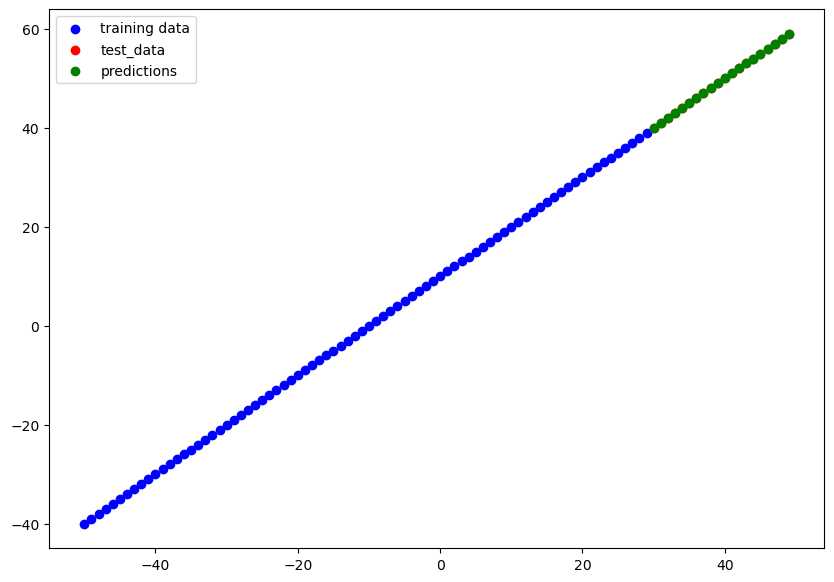

In [9]:
def plot_predictions(X_train, y_train, X_test, y_test, predictions):
    plt.figure(figsize=(10, 7))
    plt.scatter(X_train, y_train, c='b', label="training data")
    plt.scatter(X_test, y_test, c='r', label="test_data")
    plt.scatter(X_test, predictions, c='g', label="predictions")
    plt.legend()
    
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [10]:
#make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [11]:
mae(y_test, y_pred), mse(y_test, y_pred)

(<tf.Tensor: shape=(), dtype=float32, numpy=4.577637e-06>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.4738257e-11>)

### improve our model

build a mode -> fit it -> evaluate it -> tweak it -> fit it ...

1. get more data
2. make your model larger
3. Train for longer

3 modelling experiments:
 
1. `model1` - same as the oriminal model, 1 layer, trained for 100 epochs
2. `model2` - 2 layers, trained for 100 epochs
2. `model3` - 2 layers, trianed for 500 epochs

In [12]:
X_train, y_train

(<tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29])>,
 <tf.Tensor: shape=(80,), dtype=int32, numpy=
 array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38

**build model1**

In [13]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.SGD(), 
                          metrics=['mae'])

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 6ms/step - loss: 11.6562 - mae: 11.6562
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 7.9395 - mae: 7.9395
Epoch 3/100
3/3 [==============================] - 0s 7ms/step - loss: 8.0791 - mae: 8.0791
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 8.0746 - mae: 8.0746
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 8.3047 - mae: 8.3047
Epoch 6/100
3/3 [==============================] - 0s 6ms/step - loss: 7.6767 - mae: 7.6767
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 8.1050 - mae: 8.1050
Epoch 8/100
3/3 [==============================] - 0s 7ms/step - loss: 8.0754 - mae: 8.0754
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 7.6108 - mae: 7.6108
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 7.7284 - mae: 7.7284
Epoch 11/100
3/3 [==============================] - 0s 7ms/step - loss: 7.598

In [14]:
y_preds_1 = model_1.predict(X_test)

1/1 [==============================] - 0s 98ms/step


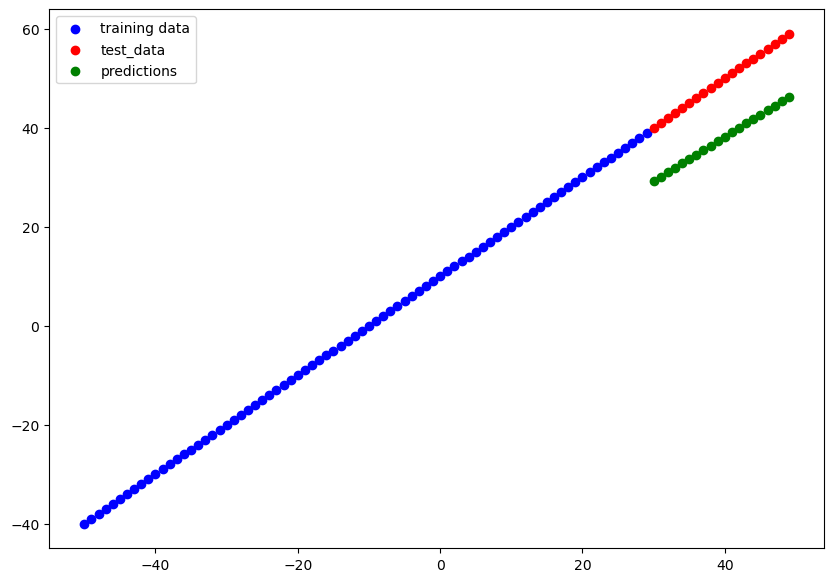

In [15]:
plot_predictions(X_train, y_train, X_test, y_test, y_preds_1)

In [16]:
# calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=11.75585>,
 <tf.Tensor: shape=(), dtype=float32, numpy=138.54337>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs


In [17]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(), 
               metrics=['mse'])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 8ms/step - loss: 19.5920 - mse: 592.6308
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 8.5988 - mse: 94.3746
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 9.9953 - mse: 123.6082
Epoch 4/100
3/3 [==============================] - 0s 8ms/step - loss: 9.0154 - mse: 97.0252
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 8.4939 - mse: 88.0755
Epoch 6/100
3/3 [==============================] - 0s 8ms/step - loss: 8.8106 - mse: 96.8964
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 8.9341 - mse: 103.4817
Epoch 8/100
3/3 [==============================] - 0s 8ms/step - loss: 9.7448 - mse: 119.7265
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 8.4863 - mse: 87.9368
Epoch 10/100
3/3 [==============================] - 0s 9ms/step - loss: 8.9804 - mse: 106.5711
Epoch 11/100
3/3 [==============================] - 0s 7ms/step

1/1 [==============================] - 0s 70ms/step


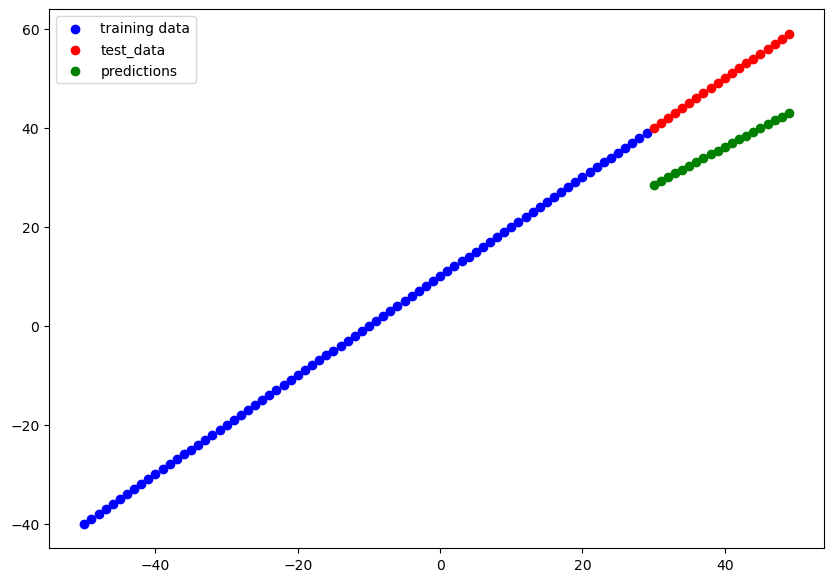

In [18]:
y_preds_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_2)

In [19]:
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.735461>,
 <tf.Tensor: shape=(), dtype=float32, numpy=190.52682>)

**build `model_3`**

* 2 layers, trainde fro 500 epochs

In [20]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae, 
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 11ms/step - loss: 14.6506 - mae: 14.6506
Epoch 2/500
3/3 [==============================] - 0s 6ms/step - loss: 9.7729 - mae: 9.7729
Epoch 3/500
3/3 [==============================] - 0s 11ms/step - loss: 13.4394 - mae: 13.4394
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 10.5059 - mae: 10.5059
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 7.9918 - mae: 7.9918
Epoch 6/500
3/3 [==============================] - 0s 8ms/step - loss: 10.0145 - mae: 10.0145
Epoch 7/500
3/3 [==============================] - 0s 6ms/step - loss: 9.9714 - mae: 9.9714
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 11.1789 - mae: 11.1789
Epoch 9/500
3/3 [==============================] - 0s 10ms/step - loss: 9.1347 - mae: 9.1347
Epoch 10/500
3/3 [==============================] - 0s 11ms/step - loss: 10.8229 - mae: 10.8229
Epoch 11/500
3/3 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 122ms/step


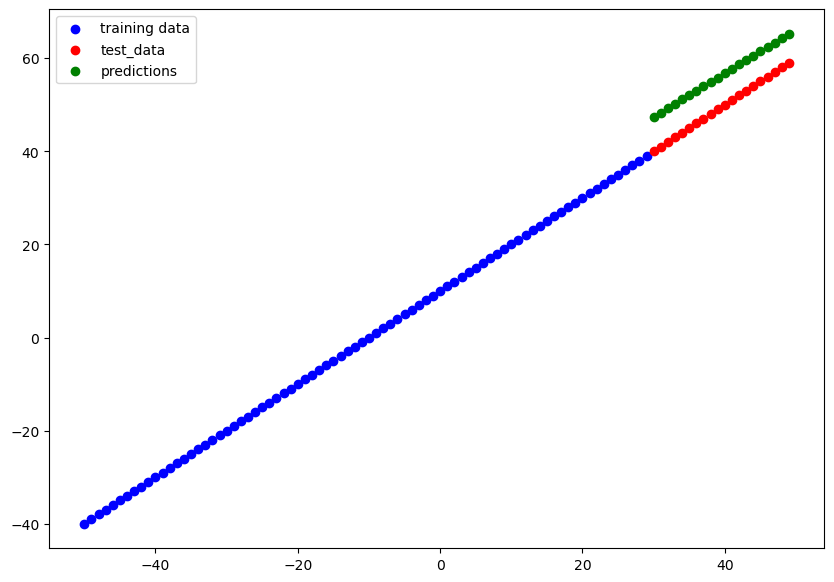

In [21]:
y_preds_3 = model_3.predict(y_test)
plot_predictions(X_train, y_train, X_test, y_test, y_preds_3)


In [22]:
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=6.8010926>,
 <tf.Tensor: shape=(), dtype=float32, numpy=46.372368>)

## comparing the results of our experiments


In [23]:
# let's compare our model's results using a pandas dataframe
import pandas as pd
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()], 
                ["model_2", mae_2.numpy(), mse_2.numpy()], 
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,11.755850,138.543365
1,model_2,13.735461,190.526825
2,model_3,6.801093,46.372368


## Tracking your experiments

* TensorBoard - a component of the tensorflow library to help track modelling expreriments
* Weights & Biases - a tool for tracking all of kinds of machine learning experiments

## Saving our model

In [24]:
# save model using the SaveModel format
model_3.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format\assets


In [26]:
# save model using the HDF5 format
model_3.save("best_model_HDF5_format.h5")

C:\Users\my pc\.conda\envs\p3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
